In [1]:
# install dependencies: 
# !pip install pyyaml==5.1
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

In [3]:
# Some basic setup:

#import torch and torchvision
import torch,torchvision
print(torch.__version__, torch.cuda.is_available())

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [8]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("pannuke_train", {}, "/content/drive/MyDrive/final_pannuke_dataset/pannuke_train.json", "/content/drive/MyDrive/final_pannuke_dataset/train/")
register_coco_instances("pannuke_val", {}, "/content/drive/MyDrive/final_pannuke_dataset/pannuke_val.json", "/content/drive/MyDrive/final_pannuke_dataset/val/")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[06/14 23:04:09 d2.data.datasets.coco]: Loaded 2032 images in COCO format from /content/drive/MyDrive/final_pannuke_dataset/pannuke_train.json


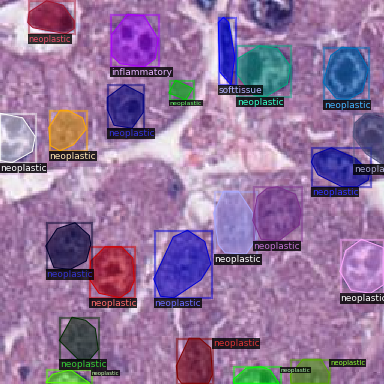

In [28]:
#visualize training data
dataset_dicts = DatasetCatalog.get("pannuke_train")
for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("pannuke_train"), scale=1.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [11]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("pannuke_train",)
cfg.DATASETS.TEST = ("pannuke_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0001  
cfg.SOLVER.MAX_ITER = 1500    
cfg.SOLVER.STEPS = []  
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [12]:
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/14 21:51:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:21, 12.0MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (6, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (6,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (20, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (20,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[06/14 21:51:40 d2.engine.train_loop]: Starting training from iteration 0
[06/14 21:52:14 d2.utils.events]:  eta: 0:40:14  iter: 19  total_loss: 5.72  loss_cls: 1.871  loss_box_reg: 0.6013  loss_mask: 0.6947  loss_rpn_cls: 2.378  loss_rpn_loc: 0.1751  time: 1.6267  data_time: 0.0452  lr: 1.9981e-06  max_mem: 3156M
[06/14 21:52:46 d2.utils.events]:  eta: 0:39:42  iter: 39  total_loss: 5.185  loss_cls: 1.783  loss_box_reg: 0.5522  loss_mask: 0.6941  loss_rpn_cls: 1.921  loss_rpn_loc: 0.2284  time: 1.6312  data_time: 0.0064  lr: 3.9961e-06  max_mem: 3292M
[06/14 21:53:21 d2.utils.events]:  eta: 0:40:24  iter: 59  total_loss: 4.163  loss_cls: 1.643  loss_box_reg: 0.5454  loss_mask: 0.6925  loss_rpn_cls: 1.092  loss_rpn_loc: 0.1619  time: 1.6684  data_time: 0.0066  lr: 5.9941e-06  max_mem: 3295M
[06/14 21:53:56 d2.utils.events]:  eta: 0:40:16  iter: 79  total_loss: 3.73  loss_cls: 1.531  loss_box_reg: 0.5145  loss_mask: 0.6908  loss_rpn_cls: 0.8219  loss_rpn_loc: 0.1819  time: 1.6813  data_

In [47]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [48]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("pannuke_val", ("bbox", "segm"), False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "pannuke_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[06/14 23:15:05 d2.data.datasets.coco]: Loaded 508 images in COCO format from /content/drive/MyDrive/final_pannuke_dataset/pannuke_val.json
[06/14 23:15:06 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/14 23:15:06 d2.data.common]: Serializing 508 elements to byte tensors and concatenating them all ...
[06/14 23:15:06 d2.data.common]: Serialized dataset takes 2.60 MiB
[06/14 23:15:06 d2.evaluation.evaluator]: Start inference on 508 images
[06/14 23:15:10 d2.evaluation.evaluator]: Inference done 11/508. 0.3808 s / img. ETA=0:03:19
[06/14 23:15:16 d2.evaluation.evaluator]: Inference done 24/508. 0.3779 s / img. ETA=0:03:12
[06/14 23:15:21 d2.evaluation.evaluator]: Inference done 37/508. 0.3763 s / img. ETA=0:03:06
[06/14 23:15:26 d2.evaluation.evaluator]: Inference done 50/508. 0.3756 s / img. ETA=0:03:00
[06/14 23:15:31 d2.evaluation.evaluator]: Inference done 63/508. 

[06/14 23:19:05 d2.data.datasets.coco]: Loaded 508 images in COCO format from /content/drive/MyDrive/final_pannuke_dataset/pannuke_val.json


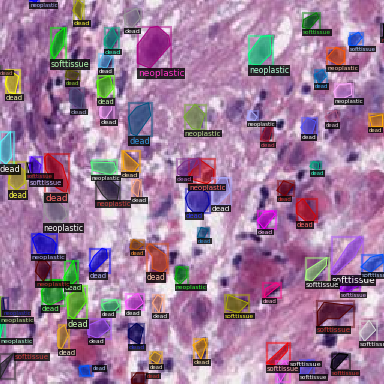

In [49]:
# visualise the ground truth
id = 4
dataset_dicts = DatasetCatalog.get("pannuke_val")
img = cv2.imread(dataset_dicts[id]["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("pannuke_val"), scale=1.5)
vis = visualizer.draw_dataset_dict(dataset_dicts[id])
print('ground truth')
cv2_imshow(vis.get_image()[:, :, ::-1])

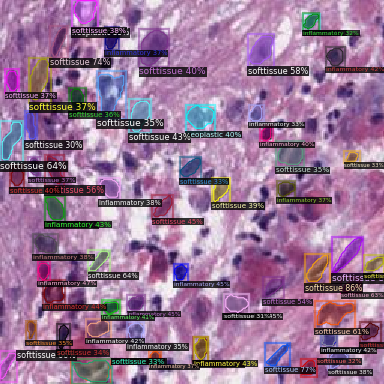

In [50]:
# now visualise the prediction for the same image
img = cv2.imread(dataset_dicts[id]["file_name"])
outputs = predictor(img) 
v = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("pannuke_val"), scale=1.5, instance_mode=ColorMode.IMAGE_BW)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
print('model prediction')
cv2_imshow(v.get_image()[:, :, ::-1])